A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state

In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing dataset
bike_df = pd.read_csv('day.csv')


In [3]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_df.dteday = pd.to_datetime(bike_df.dteday)

In [5]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [8]:
#Determining the number of rows and columns
bike_df.shape

(730, 16)

#### Peforming EDA  

In [9]:
#Rename the columns for better understanding
bike_df.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'count','dteday':'Date','atemp':'temp_feel_like'}, inplace = True) 
bike_df.head()

,instant,Date,season,Year,month,holiday,weekday,workingday,weathersit,temp,temp_feel_like,humidity,windspeed,casual,registered,count
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
#Checking missing values
bike_df.isnull().sum()

instant           0
Date              0
season            0
Year              0
month             0
holiday           0
weekday           0
workingday        0
weathersit        0
temp              0
temp_feel_like    0
humidity          0
windspeed         0
casual            0
registered        0
count             0
dtype: int64

No Null Values 

In [11]:
# remove duplicates
bike_df.drop_duplicates(subset=None, inplace = True)
bike_df.shape

(730, 16)

In [12]:
# Features that needs to drop which are not required
varlist =  ['registered', 'casual', 'instant','Date']
bike_df.drop(varlist, axis=1, inplace=True)

In [13]:
bike_df.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,temp_feel_like,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Visualising Data 

In [14]:
features = ['season','Year','month','holiday','weekday','workingday','weathersit','temp','temp_feel_like','humidity','windspeed','count']


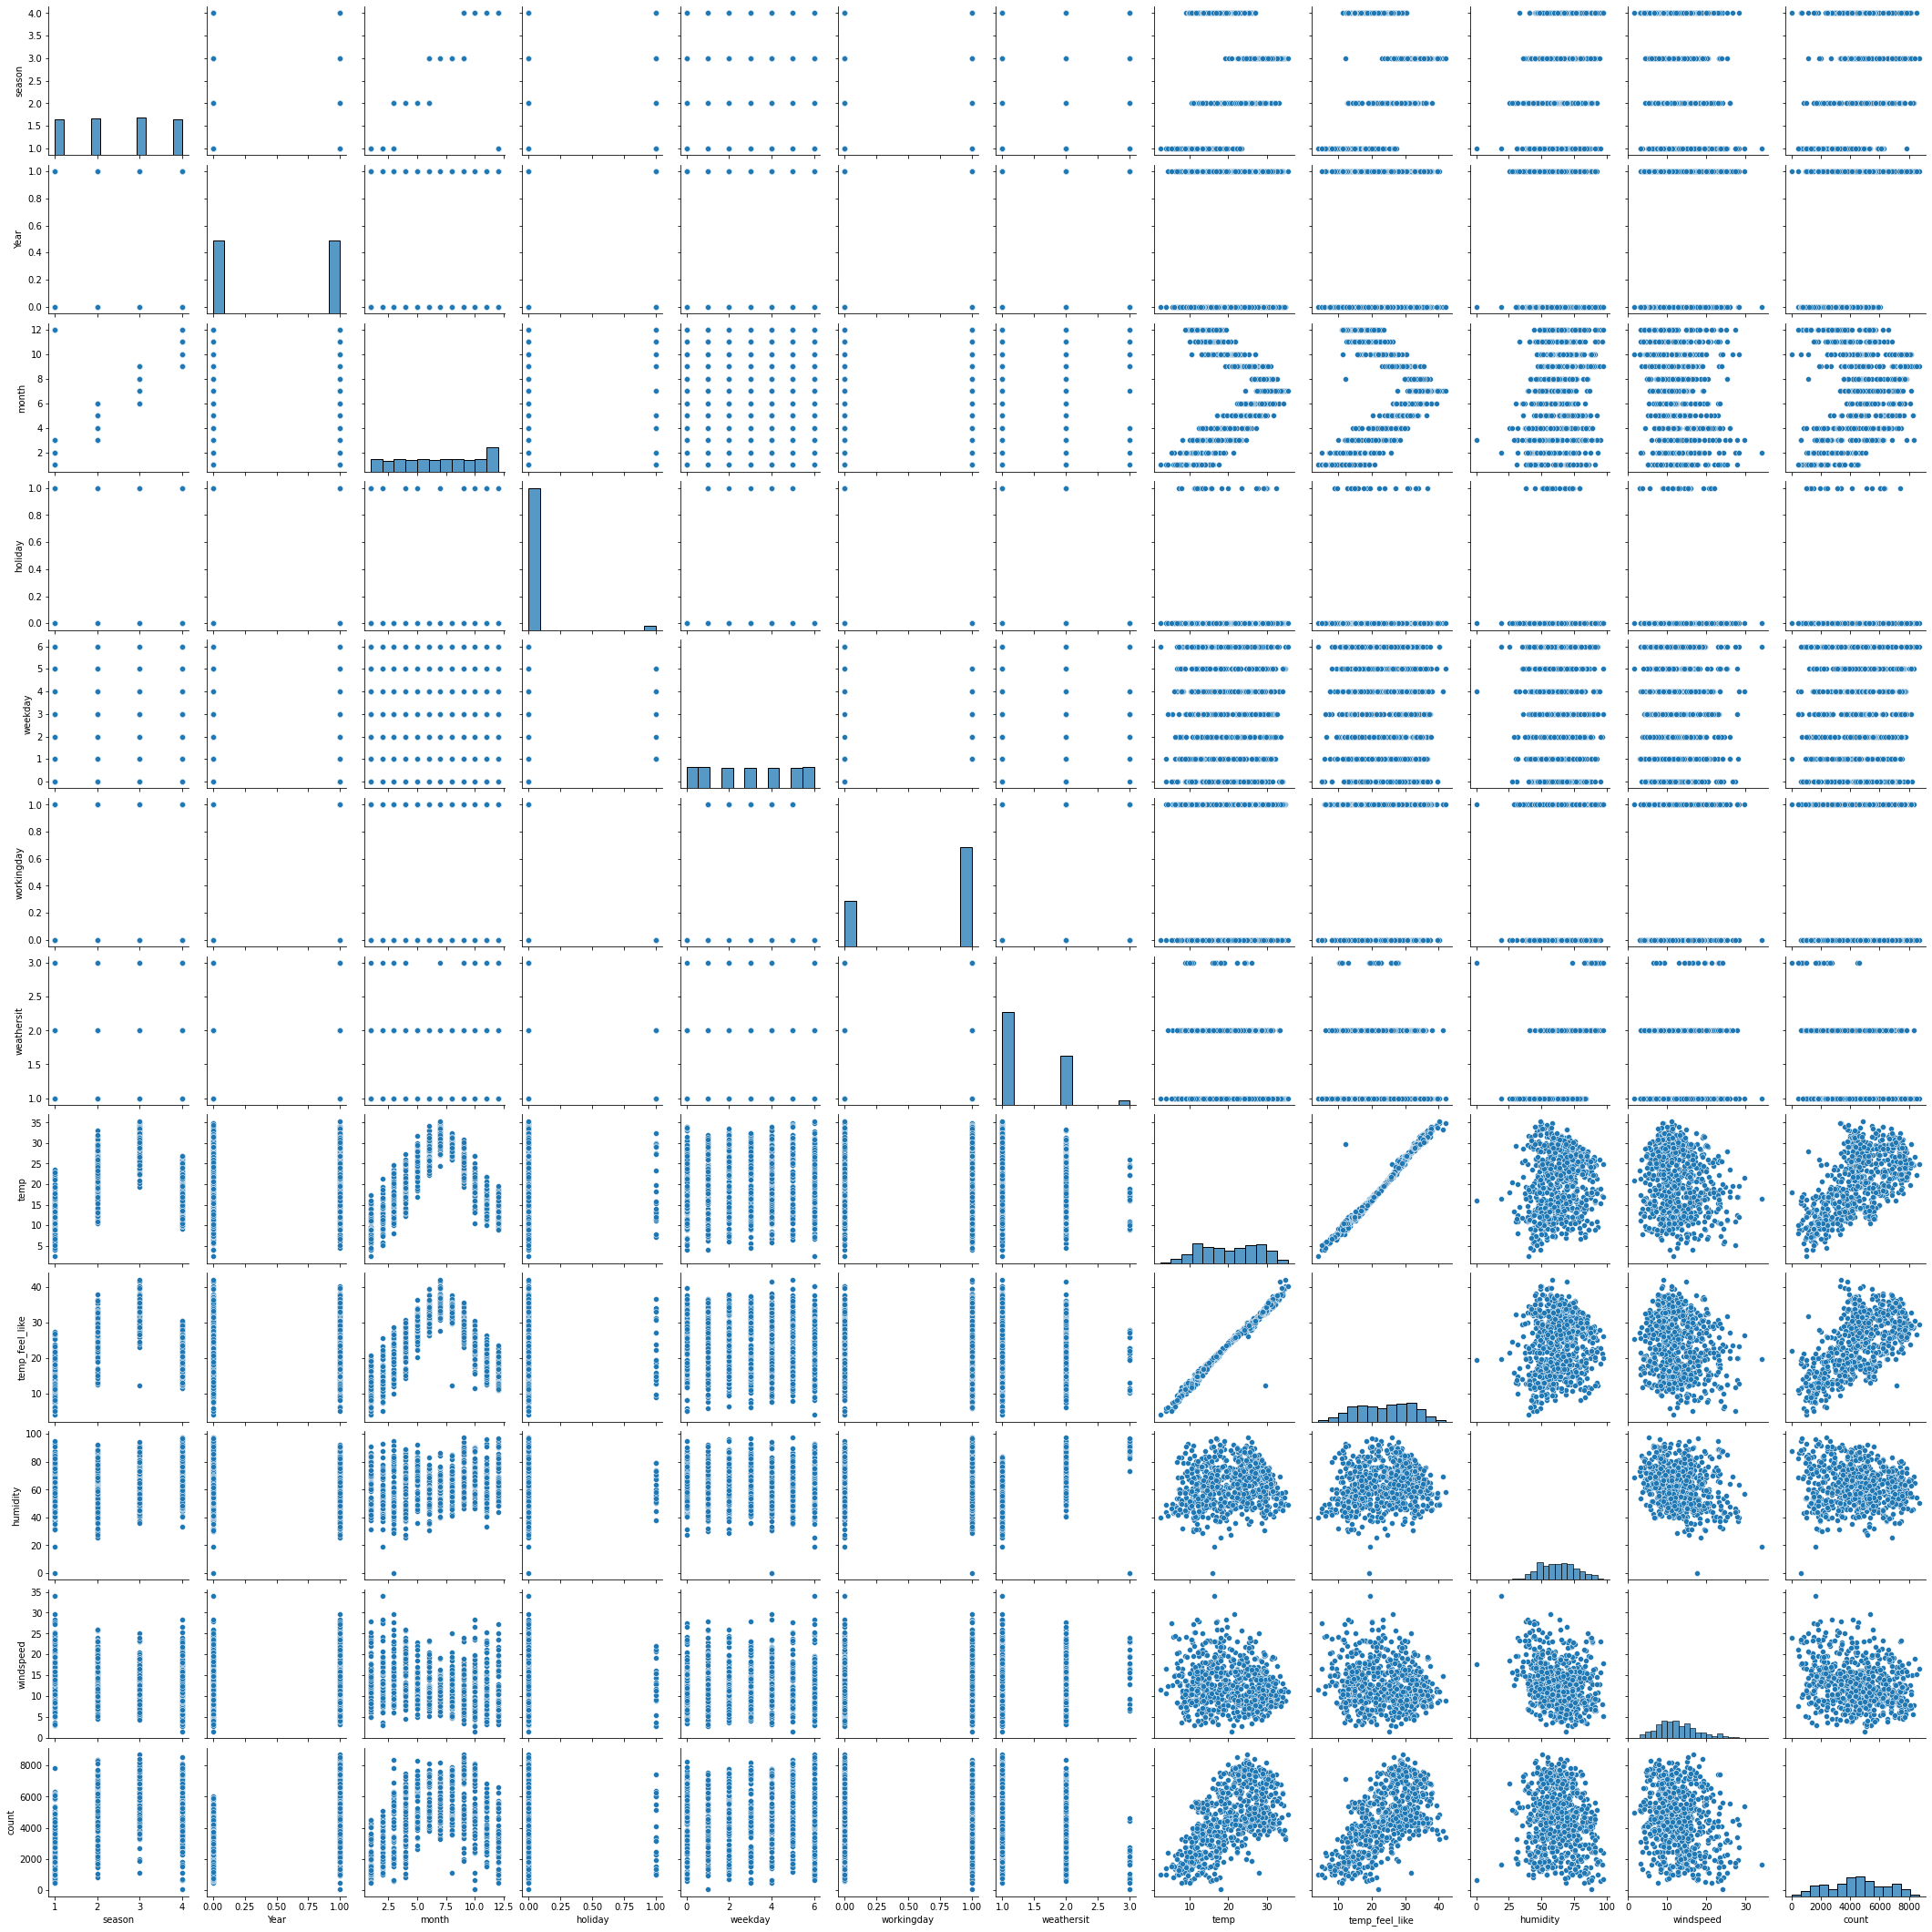

In [15]:
sns.pairplot(bike_df,vars=features)
plt.show()

 Looking at above  plots , we can see that there are some independent variables look positively correlated to the 'count' variable.

* Bike rentals are more correlated to temperature

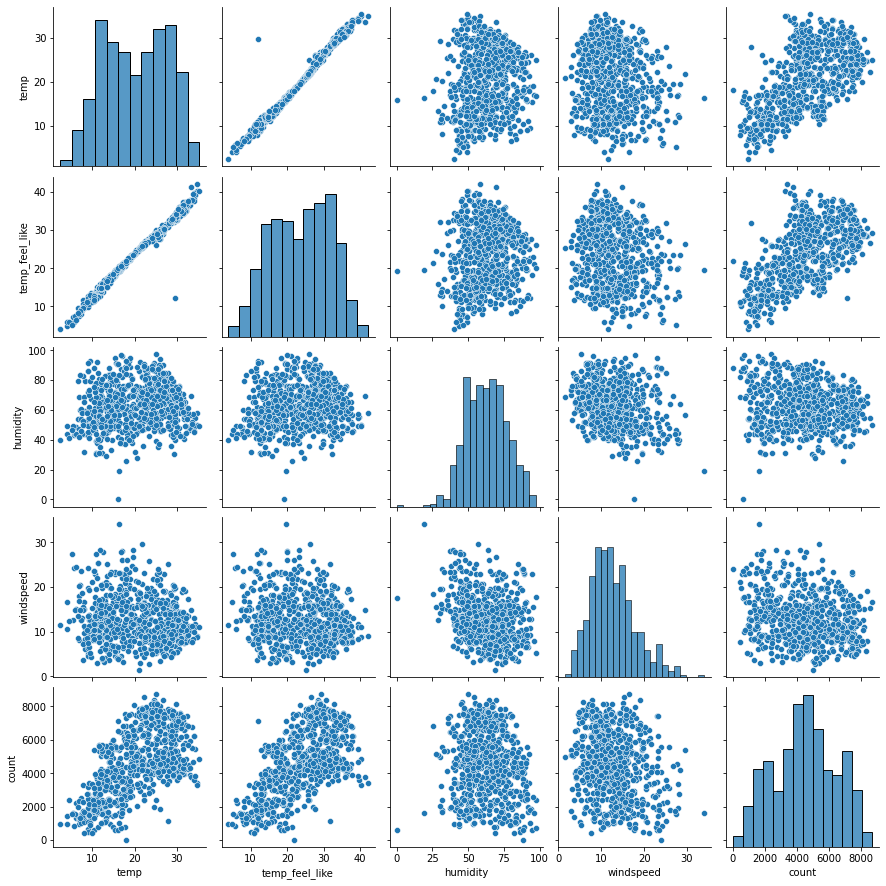

In [16]:
# Pair plot with specific variables
sns.pairplot(data = bike_df, vars = ['temp', 'temp_feel_like', 'humidity', 'windspeed', 'count'])
plt.show()

In [17]:
bike_df_copy = bike_df.copy()

In [18]:
bike_df_copy.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,temp_feel_like,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
#Mapping variables season, month, weathersit, weekday

bike_df_copy['season']=bike_df_copy.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike_df_copy['month']=bike_df_copy.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike_df_copy['weathersit']=bike_df_copy.weathersit.map({1: 'Clear',2:'Misty',3:'Ligh_Snow',4:'Heavy_rain_snow'})
bike_df_copy['weekday']=bike_df_copy.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
# bike_df['Year']=bike_df.Year.map({0: "2018", 1: "2019"})

bike_df.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,temp_feel_like,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    int64  
 1   Year            730 non-null    int64  
 2   month           730 non-null    int64  
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    int64  
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    int64  
 7   temp            730 non-null    float64
 8   temp_feel_like  730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  count           730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


### Visualising Categorical Variables¶


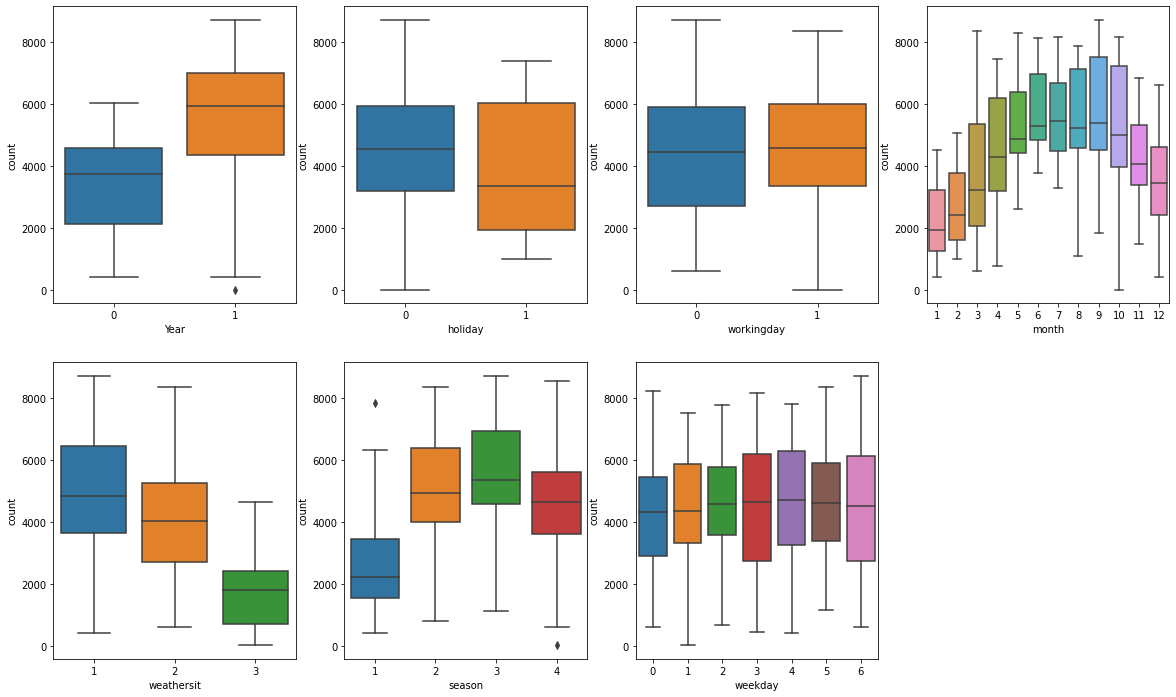

In [21]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'Year', y = 'count', data = bike_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'count', data = bike_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'count', data = bike_df)
plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'count', data = bike_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'count', data = bike_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'count', data = bike_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'count', data = bike_df)
plt.show()

The plots above shows the relationship between categorical variables and a Target variable.

* Bike Rentals count are more during the Fall season and then in summer
* Bike Rentals count are more in the year 2019 compared to 2018
* Bike Rentals count are more in Clear weather and less in snow 
* Bike Rentals count are more on Saturday,wednesday and thursday

### Analysing Categorical variables individualy

In [22]:
def categorical_plot(x,plothue=None):
    plt.figure(figsize=(10,5))
    ax = sns.barplot(x=x, y="count", data=bike_df,palette="viridis",hue=plothue,errwidth=0)
    for i in ax.containers:
        ax.bar_label(i,)
    plt.show()

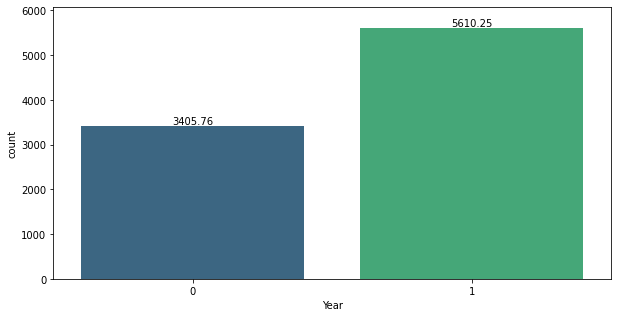

In [23]:
#Barplot to see relation between year and count of bike rentals
categorical_plot('Year')

More bike rentals happened in year 2019

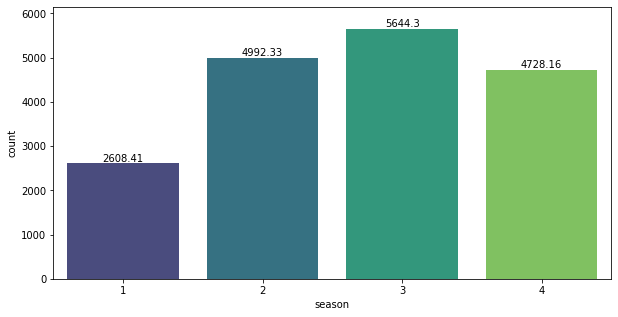

In [24]:
#Barplot to see relation between season and count of bike rentals
categorical_plot('season')

Bike Rentals are more in Summer and Fall , Less in Spring

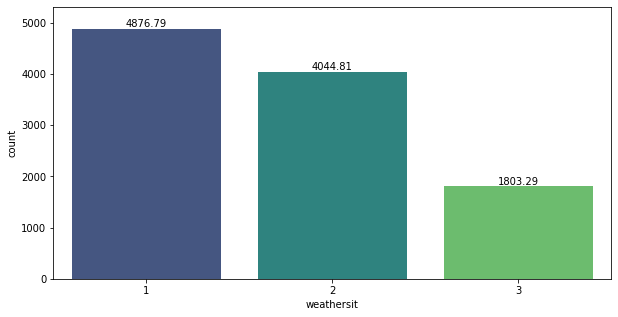

In [25]:
#Relation between weather and count of bike rentals
categorical_plot('weathersit')

Bike Rentals are more in Clear Weather and less in light snow

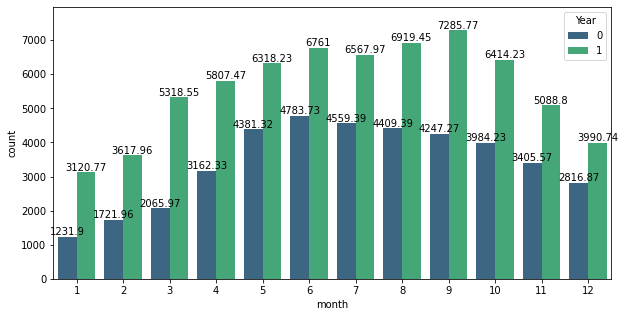

In [26]:

categorical_plot('month','Year')

Bike Rentals are more in the year 2019 compared to 2018¶


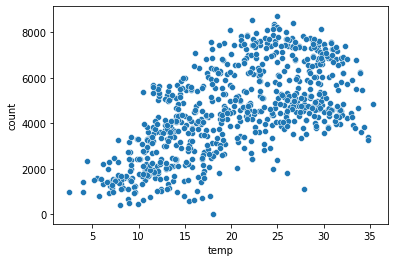

In [27]:
#scatter plot for temperature to count
sns.scatterplot(x='temp',y='count' ,data=bike_df)
plt.show()

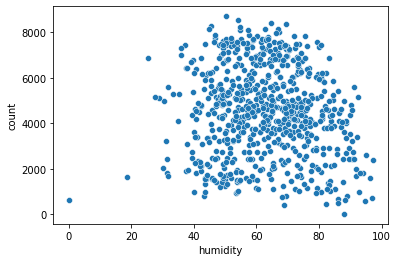

In [28]:
sns.scatterplot(x='humidity', y='count',data=bike_df)
plt.show()

More Bike rental counts observed at higher humidity

### Heatmap

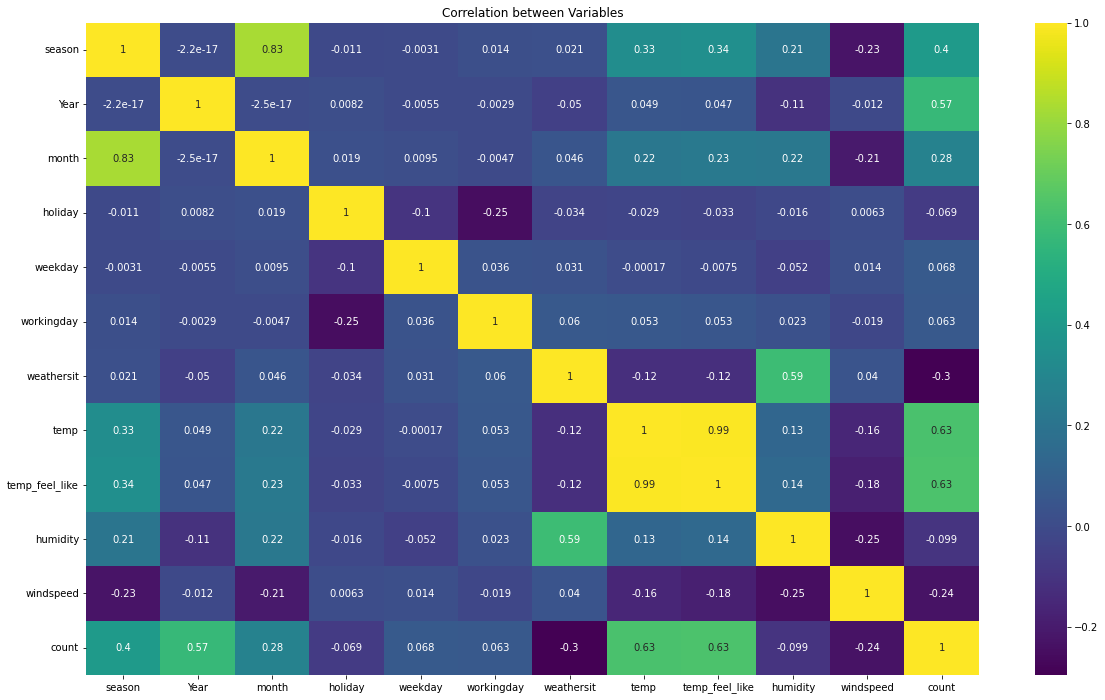

In [29]:
plt.figure(figsize=(20, 12))
sns.heatmap(bike_df.corr(), cmap='viridis', annot = True)
plt.title("Correlation between Variables")
plt.show()

We can see that Count and atemp are correlated to count variable

In [30]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    int64  
 1   Year            730 non-null    int64  
 2   month           730 non-null    int64  
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    int64  
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    int64  
 7   temp            730 non-null    float64
 8   temp_feel_like  730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  count           730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 94.1 KB


In [31]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    int64  
 1   Year            730 non-null    int64  
 2   month           730 non-null    int64  
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    int64  
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    int64  
 7   temp            730 non-null    float64
 8   temp_feel_like  730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  count           730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 94.1 KB


### Data Preparation

In [32]:
print(bike_df_copy.workingday.value_counts())
print(bike_df_copy.holiday.value_counts())
print(bike_df_copy.season.value_counts())
print(bike_df_copy.weathersit.value_counts())
print(bike_df_copy.month.value_counts())

1    499
0    231
Name: workingday, dtype: int64
0    709
1     21
Name: holiday, dtype: int64
fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64
Clear        463
Misty        246
Ligh_Snow     21
Name: weathersit, dtype: int64
Oct     62
Jan     62
May     62
Mar     62
July    62
Aug     62
Dec     62
Apr     60
Nov     60
Sep     60
June    60
Feb     56
Name: month, dtype: int64


In [33]:
bike_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   Year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   temp_feel_like  730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  count           730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


### Create dummy varibales for categorical Variables 


In [34]:
# Get the dummy variables for month, season, weathersit, weekday 
seasons = pd.get_dummies(bike_df_copy.season,drop_first=True)
months = pd.get_dummies(bike_df_copy.month,drop_first=True)
weekdays = pd.get_dummies(bike_df_copy.weekday,drop_first=True)
weather_sit = pd.get_dummies(bike_df_copy.weathersit,drop_first=True)
# year = pd.get_dummies(bike_df['Year'], drop_first = True)


In [35]:
bike_df_copy.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,temp_feel_like,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [36]:
bike_df_new =  pd.concat([bike_df_copy,seasons,months,weather_sit,weekdays], axis = 1)
bike_df.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,temp_feel_like,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [37]:
bike_df_new.shape

(730, 34)

In [38]:
bike_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   Year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   temp_feel_like  730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  count           730 non-null    int64  
 12  spring          730 non-null    uint8  
 13  summer          730 non-null    uint8  
 14  winter          730 non-null    uint8  
 15  Aug             730 non-null    uint8  
 16  Dec             730 non-null    uint8  
 17  Feb             730 non-null    uin

In [39]:
# Dropping columns for which we have created dummies

In [40]:
bike_df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
bike_df_new.head()

,Year,holiday,workingday,temp,temp_feel_like,humidity,windspeed,count,spring,summer,...,Oct,Sep,Ligh_Snow,Misty,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
bike_df_new.columns

Index(['Year', 'holiday', 'workingday', 'temp', 'temp_feel_like', 'humidity',
       'windspeed', 'count', 'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb',
       'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Ligh_Snow',
       'Misty', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [42]:
bike_df_new.shape

(730, 30)

In [43]:
bike_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   temp_feel_like  730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   count           730 non-null    int64  
 8   spring          730 non-null    uint8  
 9   summer          730 non-null    uint8  
 10  winter          730 non-null    uint8  
 11  Aug             730 non-null    uint8  
 12  Dec             730 non-null    uint8  
 13  Feb             730 non-null    uint8  
 14  Jan             730 non-null    uint8  
 15  July            730 non-null    uint8  
 16  June            730 non-null    uint8  
 17  Mar             730 non-null    uin

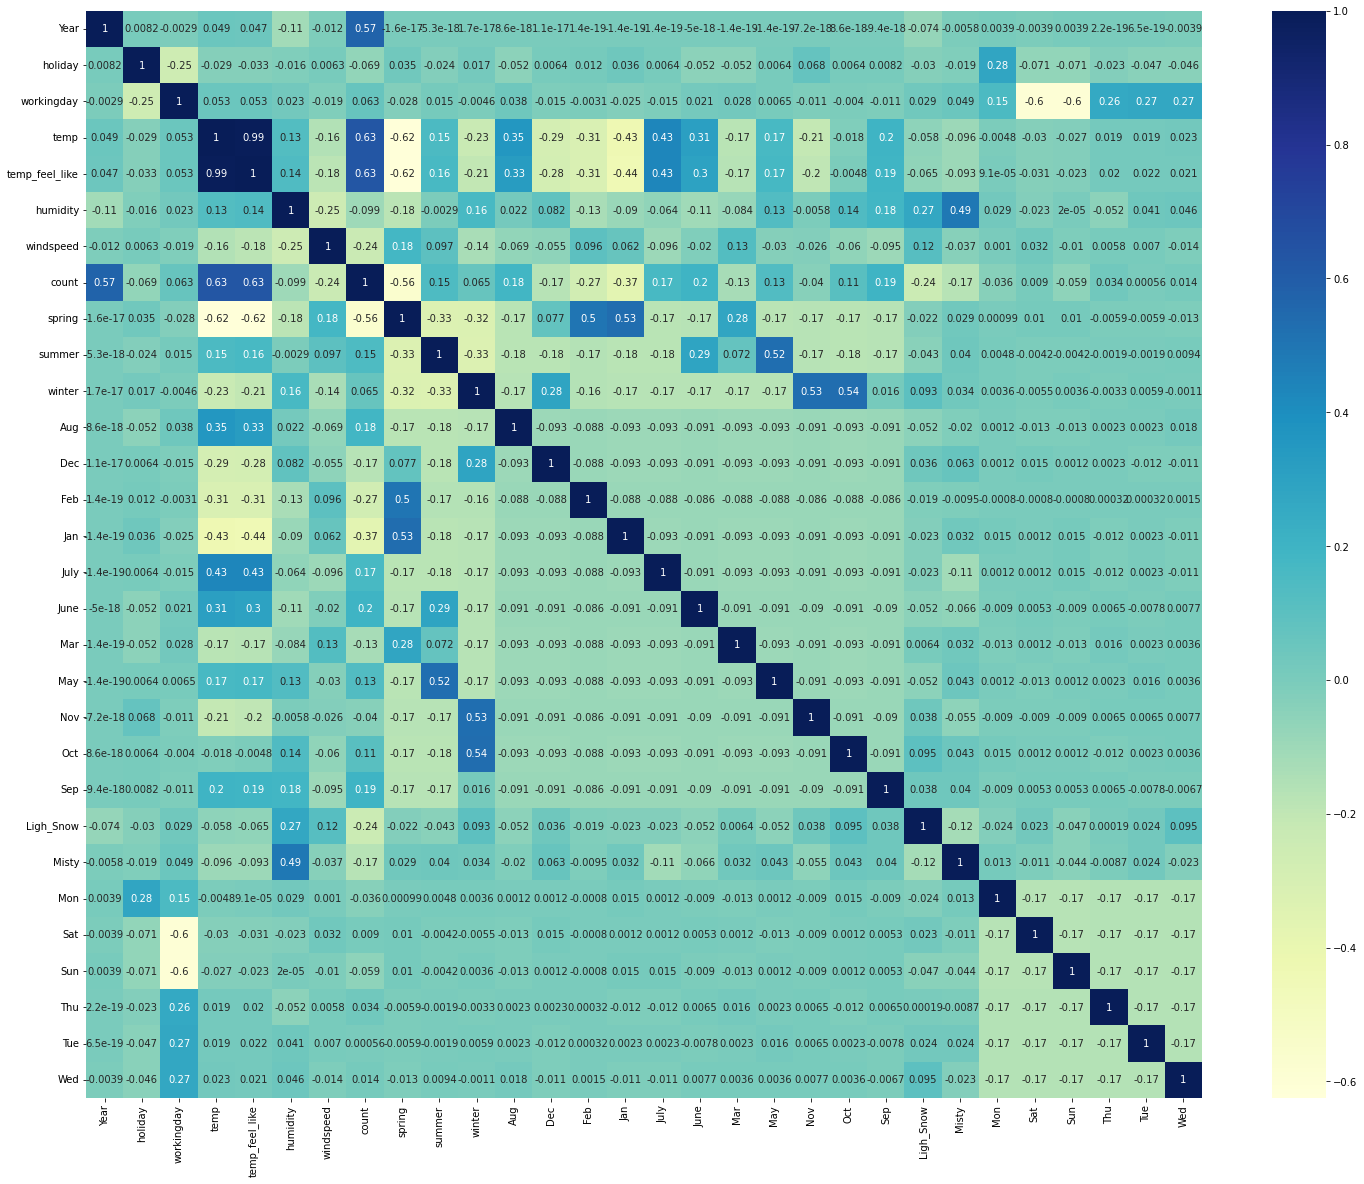

In [44]:
#Now lets check the correlation between variables again
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 20))
sns.heatmap(bike_df_new.corr(), cmap='YlGnBu', annot = True)
plt.show()

### Step : Splitting the Data into Training and Testing Sets
As you know, the first basic step for regression is performing a train-test split.

In [45]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_df_train, bike_df_test = train_test_split(bike_df_new, train_size = 0.7,test_size = 0.30, random_state = 100)

In [46]:
bike_df_test1 = bike_df_test.copy()

In [47]:
print(bike_df.shape)
print(bike_df_train.shape)
print(bike_df_test.shape)

(730, 12)
(510, 30)
(219, 30)


### Rescaling the Features

For Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for area, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

* Min-Max scaling
* Standardisation (mean-0, sigma-1)
This time, we will use MinMax scaling.

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler = MinMaxScaler()

In [50]:
bike_df_new.head()

,Year,holiday,workingday,temp,temp_feel_like,humidity,windspeed,count,spring,summer,...,Oct,Sep,Ligh_Snow,Misty,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
# Apply scaler() to all the columns except 'dummy' variables
num_vars=['temp','humidity','windspeed','count','temp_feel_like']

In [52]:
bike_df_train[num_vars] = scaler.fit_transform(bike_df_train[num_vars])

In [53]:
bike_df_train.head()

,Year,holiday,workingday,temp,temp_feel_like,humidity,windspeed,count,spring,summer,...,Oct,Sep,Ligh_Snow,Misty,Mon,Sat,Sun,Thu,Tue,Wed
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,1,0,0,0,0


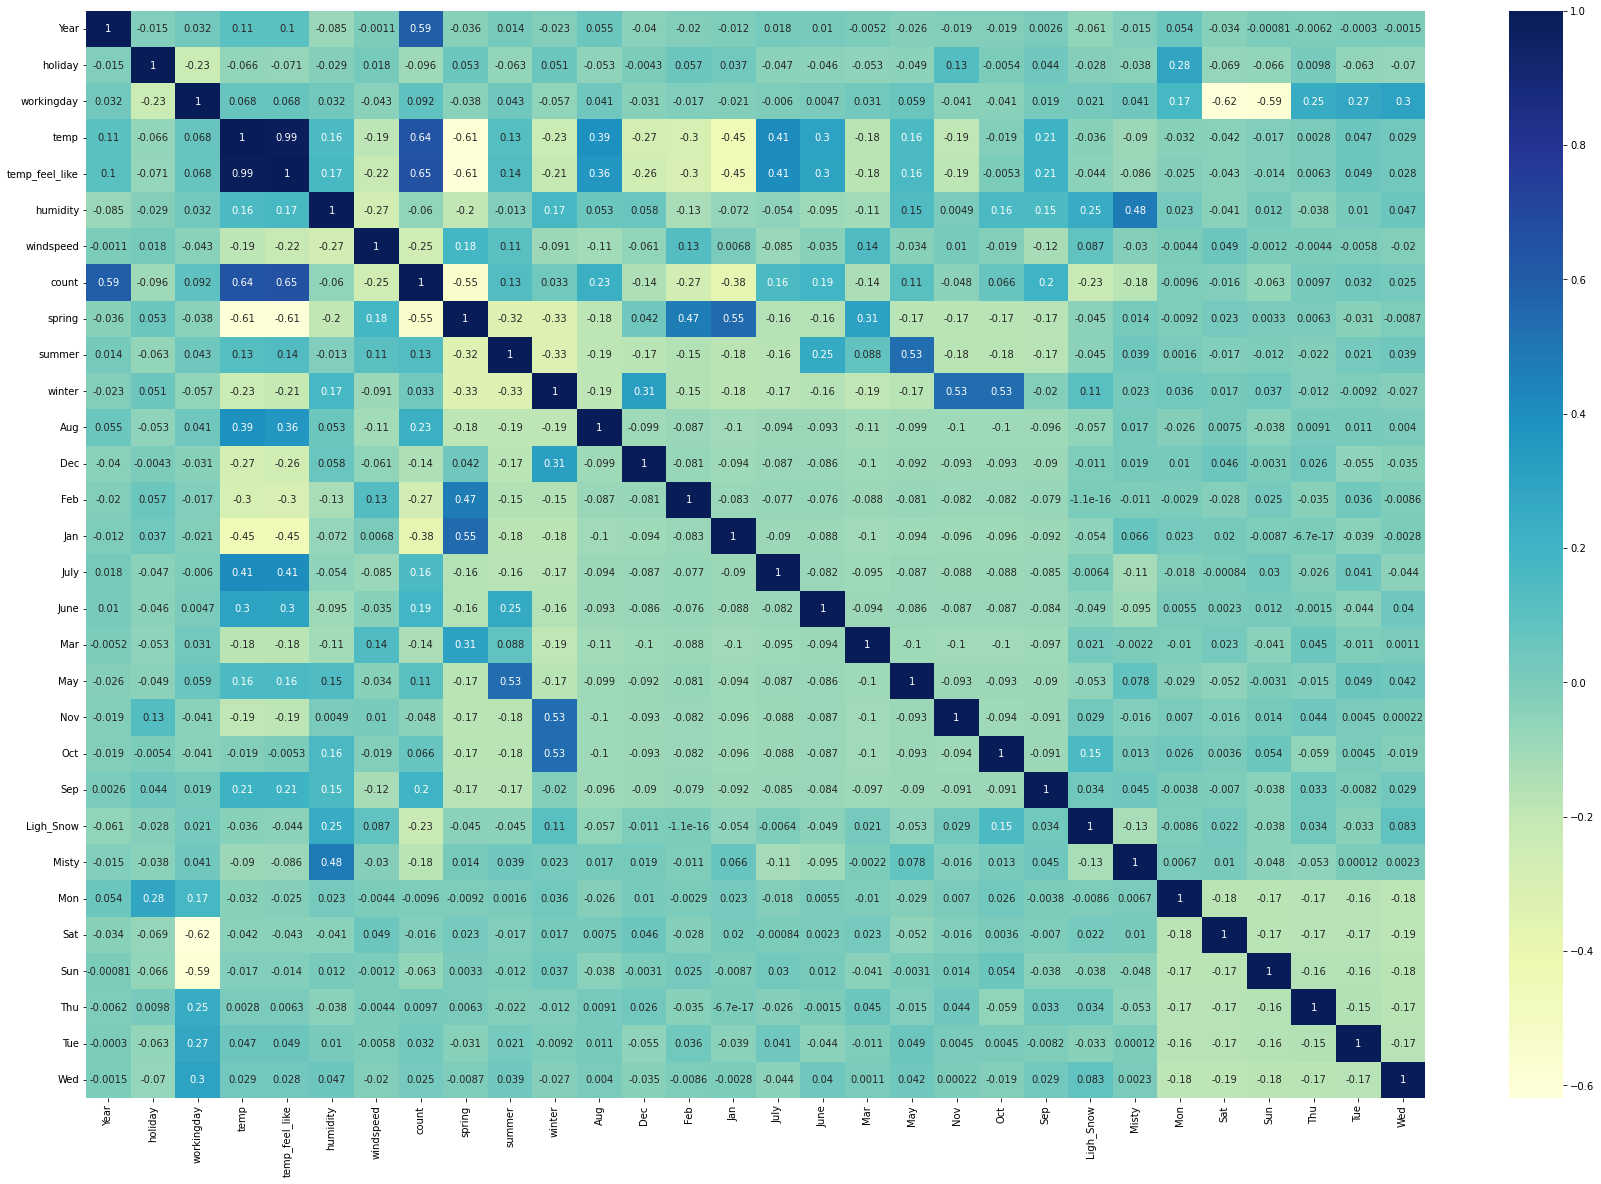

In [54]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 20))
sns.heatmap(bike_df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Temp and year are correlated to the count ,and August,September month seems to be correlated to count 

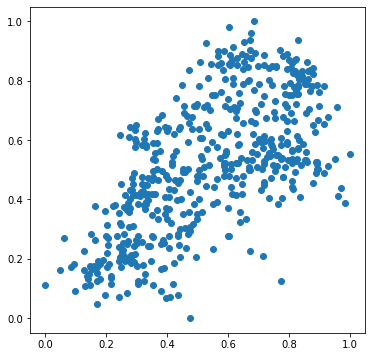

In [55]:
plt.figure(figsize=[6,6])
plt.scatter(bike_df_train.temp, bike_df_train['count'])
plt.show()

### Building our model
This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)



#### Recursive Feature Elimination

##### Dividing into X and Y sets for the model building


In [56]:
bike_df_train.columns

Index(['Year', 'holiday', 'workingday', 'temp', 'temp_feel_like', 'humidity',
       'windspeed', 'count', 'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb',
       'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Ligh_Snow',
       'Misty', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [57]:
#Divide the data into X and y
y_train = bike_df_train.pop('count')
X_train = bike_df_train

In [58]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            510 non-null    int64  
 1   holiday         510 non-null    int64  
 2   workingday      510 non-null    int64  
 3   temp            510 non-null    float64
 4   temp_feel_like  510 non-null    float64
 5   humidity        510 non-null    float64
 6   windspeed       510 non-null    float64
 7   spring          510 non-null    uint8  
 8   summer          510 non-null    uint8  
 9   winter          510 non-null    uint8  
 10  Aug             510 non-null    uint8  
 11  Dec             510 non-null    uint8  
 12  Feb             510 non-null    uint8  
 13  Jan             510 non-null    uint8  
 14  July            510 non-null    uint8  
 15  June            510 non-null    uint8  
 16  Mar             510 non-null    uint8  
 17  May             510 non-null    ui

In [59]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [60]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)


In [61]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('temp_feel_like', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 10),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 7),
 ('Nov', False, 3),
 ('Oct', False, 15),
 ('Sep', True, 1),
 ('Ligh_Snow', True, 1),
 ('Misty', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 11),
 ('Tue', False, 9),
 ('Wed', False, 12)]

In [62]:
# checking which features are considered via RFE
col = X_train.columns[rfe.support_]
col

Index(['Year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'spring', 'summer', 'winter', 'July', 'Sep', 'Ligh_Snow', 'Misty',
       'Sat', 'Sun'],
      dtype='object')

In [63]:
# checking which features are rejected
X_train.columns[~rfe.support_]

Index(['temp_feel_like', 'Aug', 'Dec', 'Feb', 'Jan', 'June', 'Mar', 'May',
       'Nov', 'Oct', 'Mon', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [64]:
# To calculate VIF of variables
def calculate_VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [65]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [66]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,50.69
13,Sat,12.20
14,Sun,11.79
6,spring,5.02
3,temp,3.62
8,winter,3.49
1,holiday,2.91
7,summer,2.61
4,humidity,1.91
12,Misty,1.57


### Linear Model Building

In [67]:
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()


In [68]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Thu, 16 Jun 2022   Prob (F-statistic):          1.13e-191
Time:                        00:37:36   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1989      0.028      7.181      0.0

In [69]:
# workingday  shows high VIF values hence dropping it
X_train_new = X_train_rfe.drop(['workingday'], axis = 1)

# Run the function to calculate VIF for the new model
calculate_VIF(X_train_new)

,Features,VIF
3,humidity,28.28
2,temp,16.06
4,windspeed,4.68
5,spring,4.03
7,winter,3.37
6,summer,2.78
11,Misty,2.30
0,Year,2.08
8,July,1.59
9,Sep,1.39


##### Rebuilding Linear Model without working day

In [70]:
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()

In [71]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Thu, 16 Jun 2022   Prob (F-statistic):          1.13e-191
Time:                        00:37:36   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2826      0.034      8.286      0.0

In [72]:
#  humidity shows high VIF values hence we can drop it
X_train_new = X_train_new.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculate_VIF(X_train_new)

,Features,VIF
2,temp,5.18
3,windspeed,4.62
5,summer,2.23
4,spring,2.13
0,Year,2.07
6,winter,1.84
7,July,1.59
10,Misty,1.55
8,Sep,1.34
11,Sat,1.23


In [73]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Thu, 16 Jun 2022   Prob (F-statistic):          5.73e-189
Time:                        00:37:36   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2039      0.029      6.987      0.0

In [74]:
# p-value for sat is high so dropping it
X_train_new = X_train_new.drop(['Sat'], axis = 1)

# Run the function to calculate VIF for the new model
calculate_VIF(X_train_new)

,Features,VIF
2,temp,5.14
3,windspeed,4.60
5,summer,2.22
4,spring,2.11
0,Year,2.07
6,winter,1.82
7,July,1.59
10,Misty,1.55
8,Sep,1.34
11,Sun,1.18


In [75]:
# Building again the 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Thu, 16 Jun 2022   Prob (F-statistic):          6.45e-190
Time:                        00:37:36   Log-Likelihood:                 508.10
No. Observations:                 510   AIC:                            -990.2
Df Residuals:                     497   BIC:                            -935.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2063      0.029      7.088      0.0

In [76]:
# p-value for july is high so dropping it
X_train_new = X_train_new.drop(['July'], axis = 1)

# Run the function to calculate VIF for the new model
calculate_VIF(X_train_new)

,Features,VIF
3,windspeed,4.59
2,temp,3.91
0,Year,2.07
4,spring,2.02
5,summer,1.90
6,winter,1.66
9,Misty,1.55
7,Sep,1.23
10,Sun,1.18
8,Ligh_Snow,1.08


In [77]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     236.1
Date:                Thu, 16 Jun 2022   Prob (F-statistic):          1.51e-189
Time:                        00:37:36   Log-Likelihood:                 504.38
No. Observations:                 510   AIC:                            -984.8
Df Residuals:                     498   BIC:                            -933.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1983      0.029      6.806      0.0

In [78]:
# p-value for july is high so dropping it
X_train_new = X_train_new.drop(['spring'], axis = 1)

# Run the function to calculate VIF for the new model
calculate_VIF(X_train_new)

,Features,VIF
2,temp,3.72
3,windspeed,3.08
0,Year,2.00
4,summer,1.56
8,Misty,1.48
5,winter,1.39
6,Sep,1.21
9,Sun,1.16
7,Ligh_Snow,1.08
1,holiday,1.04


In [79]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.0
Date:                Thu, 16 Jun 2022   Prob (F-statistic):          2.88e-189
Time:                        00:37:36   Log-Likelihood:                 500.84
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     499   BIC:                            -933.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1350      0.017      8.129      0.0

for all the predictors seems to be significant as there seems to be VERY LOW Multicollinearity between the predictors and the p-values For now, we will consider this as our final model.

In [80]:
# Checking the parameters and their coefficient values
lr_6.params

const        0.134956
Year         0.232661
holiday     -0.107197
temp         0.547141
windspeed   -0.153106
summer       0.086611
winter       0.132288
Sep          0.099241
Ligh_Snow   -0.289246
Misty       -0.081871
Sun         -0.049981
dtype: float64

All coefficients are not equal to zero, which means We can REJECT the NULL HYPOTHESIS

Inference
- Count of bike booking increases with increase in temp 
- Count of bike booking increase inmonth of Sep and is high in summer season
- Count of bike booking Decreases wrt Holiday, Windspeed, Sunday, snow rain, Misty.

#### Residual Analysis of Train Data


In [81]:
X_train_lm_6

,const,Year,holiday,temp,windspeed,summer,winter,Sep,Ligh_Snow,Misty,Sun
653,1.0,1,0,0.509887,0.300794,0,1,0,0,0,0
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,0,1,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0,1
482,1.0,1,0,0.395666,0.188475,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,1,0,0,0,1,0
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,0,0,1,0


In [82]:
y_train_pred = lr_6.predict(X_train_lm_6)

## Normality

Text(0.5, 0, 'Errors')

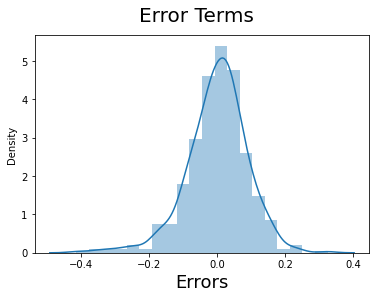

In [83]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Graph show normal distribution for Erros

## MultiColinearity

In [84]:
calculate_VIF(X_train_new)

,Features,VIF
2,temp,3.72
3,windspeed,3.08
0,Year,2.00
4,summer,1.56
8,Misty,1.48
5,winter,1.39
6,Sep,1.21
9,Sun,1.16
7,Ligh_Snow,1.08
1,holiday,1.04



VIF Value shows that there is no multicolinearity

## Check for Linearity


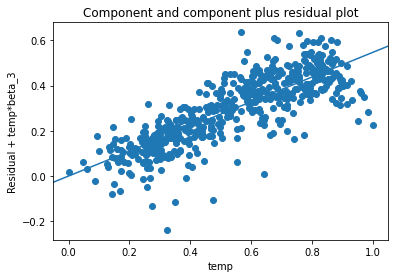

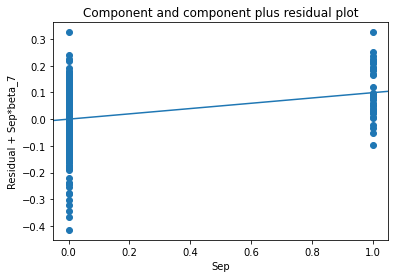

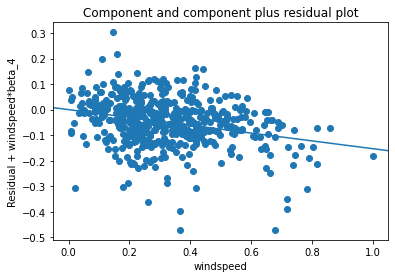

In [85]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'Sep')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

### Prediction Using Final Model

In [86]:
bike_df_test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            219 non-null    int64  
 1   holiday         219 non-null    int64  
 2   workingday      219 non-null    int64  
 3   temp            219 non-null    float64
 4   temp_feel_like  219 non-null    float64
 5   humidity        219 non-null    float64
 6   windspeed       219 non-null    float64
 7   count           219 non-null    int64  
 8   spring          219 non-null    uint8  
 9   summer          219 non-null    uint8  
 10  winter          219 non-null    uint8  
 11  Aug             219 non-null    uint8  
 12  Dec             219 non-null    uint8  
 13  Feb             219 non-null    uint8  
 14  Jan             219 non-null    uint8  
 15  July            219 non-null    uint8  
 16  June            219 non-null    uint8  
 17  Mar             219 non-null    ui

In [87]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars=['temp','humidity','windspeed','count','temp_feel_like']

bike_df_test1[num_vars] = scaler.transform(bike_df_test1[num_vars])

In [88]:
bike_df_test1

,Year,holiday,workingday,temp,temp_feel_like,humidity,windspeed,count,spring,summer,...,Oct,Sep,Ligh_Snow,Misty,Mon,Sat,Sun,Thu,Tue,Wed
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,1,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,0.257562,0.243430,0.708888,0.287411,0.336516,1,0,...,0,0,0,1,0,0,1,0,0,0
702,1,0,1,0.519232,0.511907,0.756118,0.283397,0.757478,0,0,...,0,0,0,0,0,0,0,0,1,0
127,0,0,0,0.584649,0.577380,0.650923,0.069510,0.495973,0,1,...,0,0,0,0,0,0,1,0,0,0
640,1,0,1,0.745598,0.682653,0.817947,0.052115,0.868615,0,0,...,1,0,0,1,0,0,0,0,0,1


In [89]:
bike_df_test1.describe()

,Year,holiday,workingday,temp,temp_feel_like,humidity,windspeed,count,spring,summer,...,Oct,Sep,Ligh_Snow,Misty,Mon,Sat,Sun,Thu,Tue,Wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.027397,0.319635,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.163612,0.467403,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Test Between X_test and y_test

In [90]:
y_test = bike_df_test1.pop('count')
X_test = bike_df_test1
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            219 non-null    int64  
 1   holiday         219 non-null    int64  
 2   workingday      219 non-null    int64  
 3   temp            219 non-null    float64
 4   temp_feel_like  219 non-null    float64
 5   humidity        219 non-null    float64
 6   windspeed       219 non-null    float64
 7   spring          219 non-null    uint8  
 8   summer          219 non-null    uint8  
 9   winter          219 non-null    uint8  
 10  Aug             219 non-null    uint8  
 11  Dec             219 non-null    uint8  
 12  Feb             219 non-null    uint8  
 13  Jan             219 non-null    uint8  
 14  July            219 non-null    uint8  
 15  June            219 non-null    uint8  
 16  Mar             219 non-null    uint8  
 17  May             219 non-null    ui

In [91]:
#Selecting the variables that were part of final model.
col1 = X_train_new.columns
X_test = X_test[col1]
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   const      219 non-null    float64
 1   Year       219 non-null    int64  
 2   holiday    219 non-null    int64  
 3   temp       219 non-null    float64
 4   windspeed  219 non-null    float64
 5   summer     219 non-null    uint8  
 6   winter     219 non-null    uint8  
 7   Sep        219 non-null    uint8  
 8   Ligh_Snow  219 non-null    uint8  
 9   Misty      219 non-null    uint8  
 10  Sun        219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


In [92]:
# Making predictions using the final model (lr6)

y_pred = lr_6.predict(X_test_lm6)

In [93]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7958

### Model Evaluation

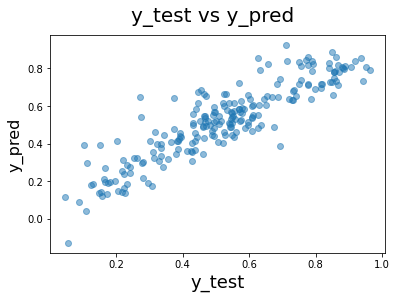

In [94]:
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [95]:
round(lr_6.params,4)

const        0.1350
Year         0.2327
holiday     -0.1072
temp         0.5471
windspeed   -0.1531
summer       0.0866
winter       0.1323
Sep          0.0992
Ligh_Snow   -0.2892
Misty       -0.0819
Sun         -0.0500
dtype: float64

In [96]:
r2_score(y_test, y_pred)

0.7958272128950749

In [97]:
# We already have the value of R^2 (calculated in above step)

r2=0.7958272128950747

In [98]:
# Get the shape of X_test
X_test.shape

(219, 10)

In [99]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7860112135150303

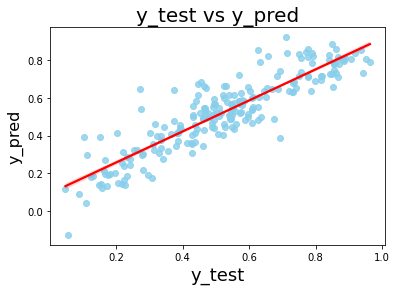

In [100]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x = y_test, y = y_pred, ci = 68, fit_reg = True, scatter_kws = {"color": "skyblue"}, line_kws = {"color": "red"})
plt.title('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)
plt.show()

### As per above analysis, the comapany should focus on the following features:
- Since there are more bookins in Spring and September , Company can plan to expand business by targeting clients

- Less bookins happen during holidays and Light Snow, company can give more discounts to attract more business or do maintnance work. 

Features to be considerd:
- temp
- holiday
- Sunday
- humidity
- windspeed
- Season
- months(January, July, September, November, December)
- weathersit( Light Snow, Mist + Cloudy)



